In [89]:
# Data manipulation
import pandas as pd
# Numeric
import numpy as np
# Neural networks
from tensorflow import keras
# Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
# Plot
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

In [44]:
print("Number of elements: ", len(X_train))
X_train

Number of elements:  60000


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [49]:
indexes = np.random.randint(0, X_train.shape[0], size=25)
images = X_train[indexes]
labels = Y_train[indexes]

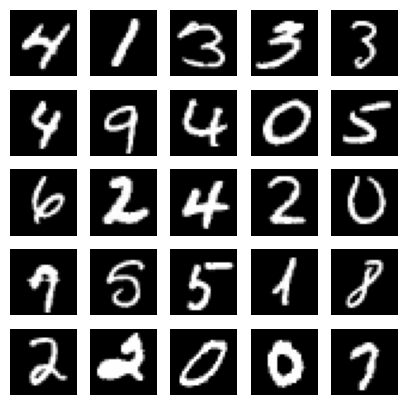

In [85]:
# images
plt.figure(figsize=(5,5)) # 25 mnist digits
for i in range(len(indexes)):
    plt.subplot(5, 5, i+1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.show()

### Importing Keras layers

In [51]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model

In [52]:
num_labels = len(np.unique(Y_train))
print("number of train labels: ", num_labels)

number of train labels:  10


In [53]:
# converting to one-hot vector
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [54]:
# getting the image dimensions
image_size = X_train.shape[1]
input_size = image_size * image_size
print("Image size: ", input_size, "px")

Image size:  784 px


In [55]:
# resizing and normalizing
X_train = np.reshape(X_train, [-1, input_size])
X_train = X_train.astype('float32')/255
X_test = np.reshape(X_test, [-1, input_size])
X_test = X_test.astype('float32')/255

In [56]:
batch_size = 128
hidden_units = 256
dropout = 0.45

We will use MLP

In [57]:
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [58]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 activation_3 (Activation)   (None, 256)               0         
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 activation_4 (Activation)   (None, 256)               0         
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 10)               

In [59]:
# Compilation of model
model.compile(loss='categorical_crossentropy', # the negative of the sum of the product of the target and the logarithm of the prediction.
              optimizer='adam', 
              metrics=['accuracy'])

In [60]:
model.fit(X_train, Y_train, epochs=20, batch_size=batch_size)

Epoch 1/20


2023-10-03 01:12:04.582022: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


469/469 [==============================] - 4s 6ms/step - loss: 0.4225 - accuracy: 0.8696
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1933 - accuracy: 0.9430
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1500 - accuracy: 0.9549
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1281 - accuracy: 0.9620
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1108 - accuracy: 0.9661
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0984 - accuracy: 0.9700
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0947 - accuracy: 0.9703
Epoch 8/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0885 - accuracy: 0.9728
Epoch 9/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0820 - accuracy: 0.9738
Epoch 10/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0770 - accuracy: 0.9761
Epoch 11/2

In [61]:
loss, accuracy = model.evaluate(X_test, Y_test, batch_size = batch_size)
print("\nAccuracy: %.2f%%" %(100.0 * accuracy))

79/79 [==============================] - 0s 4ms/step - loss: 0.0629 - accuracy: 0.9837

Accuracy: 98.37%


In [62]:
from keras.regularizers import l2 # The regularization is imposed in the Dense layer internally.
model.add(Dense(hidden_units,
                kernel_regularizer=l2(0.001), # regularization penalty to the loss
                input_dim=input_size))

### Trying Another Way to predict

In [105]:
from keras.models import Model
from keras.layers import Input, Dense, Dropout, Activation, Flatten
from keras.layers import LeakyReLU
from keras.optimizers import Adam, RMSprop
import random
from tqdm import tqdm_notebook

In [106]:
np.random.seed(123)
(X_train2, Y_train2), (X_test2, Y_test2) = keras.datasets.mnist.load_data()

In [107]:
X_train2 = X_train2.reshape(X_train2.shape[0], 784)
X_test2 = X_test2.reshape(X_test2.shape[0], 784)
X_train2 = X_train2.astype('float32')
X_test2 = X_test2.astype('float32')

In [108]:
z_dim = 100

In [110]:
adam = Adam(learning_rate=0.0002, beta_1=0.5)

model_t = Sequential()
model_t.add(Dense(256, input_dim=z_dim, activation=LeakyReLU(alpha=0.2)))
model_t.add(Dense(512, activation=LeakyReLU(alpha=0.2)))
model_t.add(Dense(1024, activation=LeakyReLU(alpha=0.2)))
model_t.add(Dense(784, activation='sigmoid'))
model_t.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

model_l = Sequential()
model_l.add(Dense(1024, input_dim=784, activation=LeakyReLU(alpha=0.2)))
model_l.add(Dropout(0.3))
model_l.add(Dense(512, activation=LeakyReLU(alpha=0.2)))
model_l.add(Dropout(0.3))
model_l.add(Dense(256, activation=LeakyReLU(alpha=0.2)))
model_l.add(Dropout(0.3))
model_l.add(Dense(1, activation='sigmoid')) 
model_l.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

model.trainable = False
inputs = Input(shape=(z_dim, ))
hidden = model_t(inputs)
output = model_l(hidden)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])